# Undersampling the pixel tables

In [1]:
import os
import re
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

data = pathlib.Path('/home/ivan/PycharmProjects/ml2021-final-project/data')
images = pathlib.Path('/home/ivan/PycharmProjects/ml2021-final-project/images')
label_regex = re.compile(r'(.*)\d\.txt')

In [2]:
if not images.exists():
    images.mkdir()

In [3]:
fin = [f for f in os.listdir(data) if '1.txt' in f]
dfs = [pd.read_csv(data / f, delimiter='\t') for f in fin]

In [4]:
dfs[0].sample(7)

,Pixel-X,Pixel-Y,Longitude,Latitude,Gamma0_VH,Gamma0_VV,elevation,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,collocationFlags
38315,5838.5,4517.5,45.537416,61.447654,0.067954,0.199860,163.47507,2.941133,0.0172,0.0229,0.0421,0.0298,0.0870,0.2082,0.2360,0.2408,0.2553,0.1309,0.0660,1
58557,5840.5,4629.5,45.537513,61.442805,0.051520,0.248560,169.38686,4.824518,0.0125,0.0205,0.0326,0.0216,0.0578,0.1527,0.1778,0.1819,0.2041,0.0882,0.0453,1
107822,6627.5,3307.5,45.609777,61.499725,0.052249,0.168868,177.87663,3.232006,0.0085,0.0178,0.0345,0.0200,0.0643,0.1529,0.1793,0.1759,0.1828,0.0981,0.0475,1
96702,6330.5,3201.5,45.582965,61.504430,0.065147,0.174558,180.91072,2.679439,0.0124,0.0212,0.0422,0.0293,0.0815,0.2007,0.2359,0.2439,0.2679,0.1270,0.0652,1
34159,5801.5,4479.5,45.534099,61.449312,0.055752,0.226011,162.06783,4.053859,0.0128,0.0198,0.0386,0.0217,0.0683,0.1878,0.2233,0.2323,0.3103,0.1054,0.0502,1
125686,6731.5,4491.5,45.618180,61.448437,0.032728,0.122608,161.51833,3.746252,0.0152,0.0240,0.0422,0.0332,0.0774,0.1751,0.1999,0.2342,0.2745,0.1255,0.0645,1
112144,6599.5,4558.5,45.606188,61.445590,0.033463,0.135868,160.16050,4.060187,0.0177,0.0275,0.0512,0.0373,0.0927,0.2100,0.2402,0.2584,0.2297,0.1366,0.0743,1


In [5]:
columns_to_drop = [
    'Pixel-X',
    'Pixel-Y',
    'Longitude',
    'Latitude',
    'elevation',
    'collocationFlags'
]

for f, df in zip(fin, dfs):
    df.drop(columns_to_drop, axis=1, inplace=True)
    df['Class'] = label_regex.findall(f)[0]

dfs[0].sample(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
85186,0.099835,0.164526,1.647980,0.0097,0.0132,0.0314,0.0165,0.0597,0.1708,0.2005,0.1866,0.2129,0.0842,0.0422,pine
53207,0.054482,0.197473,3.624553,0.0135,0.0208,0.0303,0.0202,0.0566,0.1504,0.1839,0.1779,0.1975,0.0859,0.0428,pine
137434,0.055667,0.234164,4.206489,0.0094,0.0147,0.0269,0.0201,0.0478,0.1541,0.1879,0.1868,0.2289,0.0902,0.0420,pine
6503,0.060802,0.193689,3.185551,0.0125,0.0204,0.0343,0.0200,0.0567,0.2284,0.2804,0.2974,0.2557,0.1202,0.0520,pine
147837,0.045771,0.145343,3.175472,0.0099,0.0161,0.0252,0.0178,0.0479,0.1590,0.1910,0.1750,0.2404,0.0960,0.0452,pine
35192,0.055112,0.238590,4.329169,0.0157,0.0211,0.0354,0.0241,0.0628,0.1680,0.2000,0.2016,0.2119,0.0991,0.0500,pine
17292,0.040356,0.146235,3.623671,0.0073,0.0169,0.0311,0.0188,0.0526,0.1401,0.1703,0.1854,0.2135,0.0767,0.0361,pine


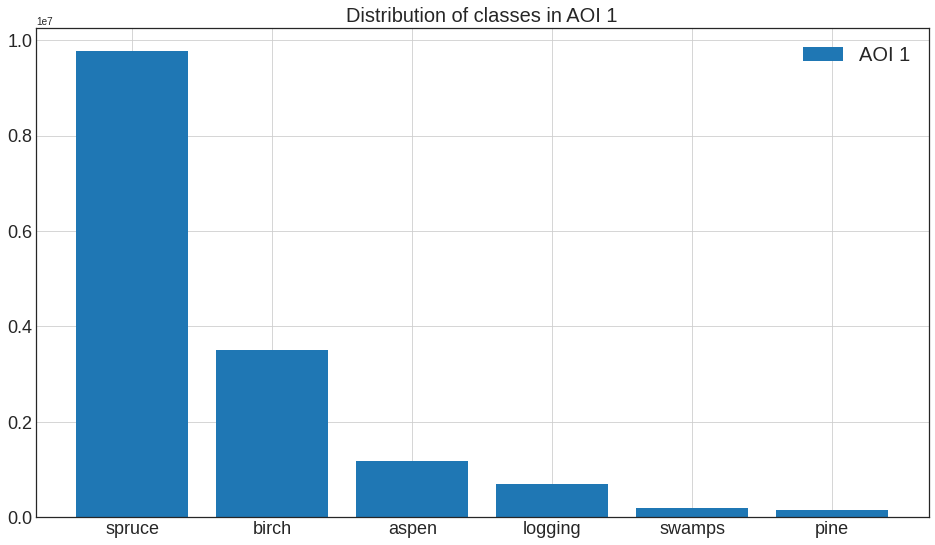

In [6]:
dfs.sort(key=lambda df: -df.shape[0])

sizes1 = [df.shape[0] for df in dfs]
labels1 = [df.iloc[0, -1] for df in dfs]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(range(len(sizes1)), sizes1, label='AOI 1')

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes1))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels1))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes in AOI 1', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_1.svg')

In [7]:
test_df_from_aoi2 = pd.read_csv(data / 'birch2.txt', delimiter='\t', nrows=10)
test_df_from_aoi2.sample(7)

,Pixel-X,Pixel-Y,Longitude,Latitude,Gamma0_VH,Gamma0_VV,elevation,Gamma0_Ratio,B1,B2,...,B11,B12,collocationFlags,pixel_classif_flags,sun_zenith,view_zenith_mean,sun_azimuth,view_azimuth_mean,elevation_S,collocationFlags1
1,9112.5,9299.5,46.471278,61.887008,0.021703,0.127020,120.55371,5.852583,0.0023,0.0145,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
0,9111.5,9299.5,46.471186,61.887009,0.021960,0.129485,119.74301,5.896361,0.0023,0.0142,...,0.1189,0.0463,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
2,9113.5,9299.5,46.471369,61.887007,0.021927,0.119369,121.36441,5.443820,0.0023,0.0145,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
4,9115.5,9299.5,46.471553,61.887005,0.024106,0.114174,122.98581,4.736397,0.0023,0.0133,...,0.1136,0.0458,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
5,9116.5,9299.5,46.471644,61.887004,0.026179,0.116486,123.79651,4.449599,0.0023,0.0133,...,0.1110,0.0431,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
8,9119.5,9299.5,46.471920,61.887001,0.031637,0.125306,124.18844,3.960819,0.0023,0.0121,...,0.1110,0.0431,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1
6,9117.5,9299.5,46.471736,61.887003,0.028465,0.119370,124.18844,4.193485,0.0023,0.0133,...,0.1110,0.0431,1,140416,50.202827,3.318978,172.16615,310.1567,116.12888,1


In [8]:
columns_to_drop = [
    'Pixel-X',
    'Pixel-Y',
    'Longitude',
    'Latitude',
    'elevation',
    'collocationFlags',
    'pixel_classif_flags',
    'sun_zenith',
    'view_zenith_mean',
    'sun_azimuth',
    'view_azimuth_mean',
    'elevation_S',
    'collocationFlags1'
]

for i in range(1, len(dfs)):
    label = dfs[i].iloc[0, -1]
    from_aoi2 = pd.read_csv(data / f'{label}2.txt', delimiter='\t')
    from_aoi2.drop(columns_to_drop, axis=1, inplace=True)
    from_aoi2['Class'] = label
    dfs[i] = dfs[i].append(from_aoi2, ignore_index=True)

In [9]:
dfs[2].head(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
0,0.039911,0.148972,3.732553,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
1,0.039702,0.143631,3.617693,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
2,0.044944,0.150328,3.344822,0.009,0.0109,0.0165,0.0101,0.0429,0.0971,0.1088,0.0934,0.196,0.0875,0.0470,aspen
3,0.048118,0.155936,3.240724,0.009,0.0166,0.0240,0.0187,0.0429,0.0971,0.1088,0.1222,0.196,0.0875,0.0470,aspen
4,0.035483,0.136933,3.859139,0.009,0.0141,0.0199,0.0144,0.0311,0.0868,0.1088,0.1297,0.196,0.0684,0.0331,aspen
5,0.036123,0.138709,3.839909,0.009,0.0141,0.0199,0.0144,0.0311,0.0868,0.1088,0.1297,0.196,0.0684,0.0331,aspen
6,0.039702,0.143631,3.617693,0.009,0.0155,0.0215,0.0133,0.0429,0.0971,0.1088,0.1332,0.196,0.0875,0.0470,aspen


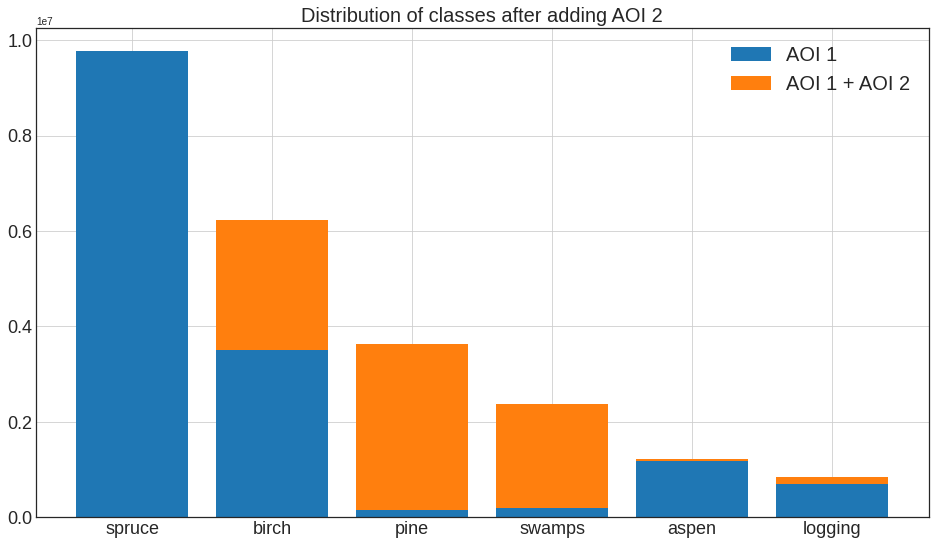

In [10]:
dfs.sort(key=lambda df: -df.shape[0])

sizes2 = [df.shape[0] for df in dfs]
labels2 = [df.iloc[0, -1] for df in dfs]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar([labels2.index(l) for l in labels1], sizes1, label='AOI 1', zorder=2)
ax.bar(range(len(sizes2)), sizes2, label='AOI 1 + AOI 2', zorder=1)

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes2))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels2))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes after adding AOI 2', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_2.svg')

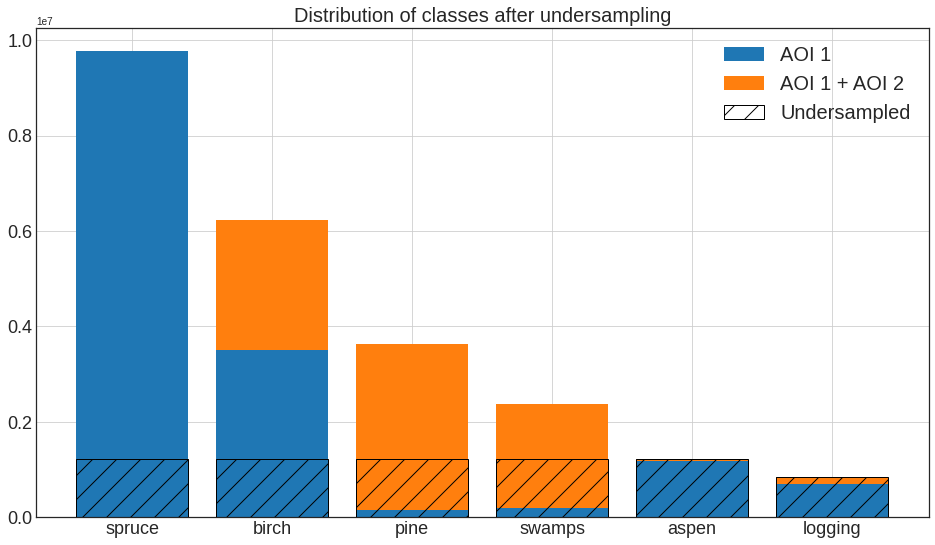

In [11]:
samples = dfs[-2].shape[0]

undersampled = []

for df in dfs:
    undersampled.append(df.iloc[:samples, :])

undersampled.sort(key=lambda df: -df.shape[0])

sizes3 = [df.shape[0] for df in undersampled]
labels3 = [df.iloc[0, -1] for df in undersampled]

fig, ax = plt.subplots(figsize=(16, 9))
ax.bar([labels2.index(l) for l in labels1], sizes1, label='AOI 1', zorder=2)
ax.bar(range(len(sizes2)), sizes2, label='AOI 1 + AOI 2', zorder=1)
ax.bar(range(len(sizes3)), sizes3, label='Undersampled', zorder=3, hatch='/', edgecolor='k', color='None')

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(sizes2))))
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels2))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.set_title('Distribution of classes after undersampling', fontsize=20)
ax.grid()
ax.legend(fontsize=20);

fig.savefig(images / 'class_distribution_undersampled.svg')

In [12]:
undersampled_df = pd.concat(undersampled)
undersampled_df = undersampled_df.sample(frac=1)

In [13]:
undersampled_df.head(7)

,Gamma0_VH,Gamma0_VV,Gamma0_Ratio,B1,B2,B3,B4,B5,B6,B7,B8,B9,B11,B12,Class
452204,0.032929,0.230551,7.001375,0.0015,0.0108,0.0220,0.0121,0.0418,0.1480,0.1862,0.1737,0.1902,0.0773,0.0323,spruce
106819,0.038901,0.150069,3.857744,0.0244,0.0336,0.0610,0.0480,0.1188,0.2513,0.2868,0.2965,0.3222,0.1562,0.0862,swamps
817774,0.045964,0.159722,3.474927,0.0097,0.0160,0.0420,0.0165,0.0689,0.2375,0.2826,0.3008,0.3159,0.1170,0.0476,birch
40175,0.035799,0.192384,5.374008,0.0066,0.0158,0.0314,0.0160,0.0574,0.2374,0.3034,0.2951,0.3178,0.1183,0.0478,birch
663036,0.033266,0.123117,3.701014,0.0058,0.0161,0.0330,0.0134,0.0520,0.1985,0.2291,0.2665,0.2376,0.0898,0.0386,birch
531483,0.016153,0.125223,7.752415,0.0127,0.0280,0.0689,0.0424,0.1467,0.3188,0.3708,0.4062,0.4267,0.1387,0.0686,swamps
794386,0.021725,0.150521,6.928492,0.0319,0.0400,0.0713,0.0514,0.1322,0.2714,0.2971,0.3310,0.3224,0.2449,0.1460,logging


In [14]:
undersampled_df.to_csv(data / 'undersampled_shuffled.csv', index=False)